# Exploratory Data Analysis

### Data Preprocessing

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
all_recipes_pp = pd.read_csv('data/PP_recipes.csv')
all_recipes_raw = pd.read_csv('data/RAW_recipes.csv')

In [3]:
#Display raw data
all_recipes_raw.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [4]:
#Display processed data 
all_recipes_pp.head()

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"


### General Data Overview

Disclaimer: it's kinda pointless to just analyze the pp data so uh yeah

In [5]:
all_recipes_raw.describe()

,id,minutes,contributor_id,n_steps,n_ingredients
count,231637.000000,2.316370e+05,2.316370e+05,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,9.765499,9.051153
std,141206.635626,4.461963e+06,9.979141e+07,5.995128,3.734796
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000
25%,99944.000000,2.000000e+01,5.690500e+04,6.000000,6.000000
50%,207249.000000,4.000000e+01,1.736140e+05,9.000000,9.000000
75%,333816.000000,6.500000e+01,3.982750e+05,12.000000,11.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000


In [6]:
all_recipes_raw.dtypes

name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

### Univariate Analysis

#### Analyzing Recipe Names

In [7]:
#Define stop words that we want to avoid
stop_words = ["the", "a", "an", "and", "or", "with", "without", "from", "of", "for", "to", "in", "on", "by", "s"]

In [8]:
#Analyze the most repeated words in name:
word_cleaner = lambda x: x.lower().strip()

#Filter out all words present in the recipe names 
all_split_names = all_recipes_raw['name'].apply(lambda x: str(x).split())
all_unigrams_in_names = pd.Series([word_cleaner(word) for name in all_split_names for word in name if word not in stop_words])
all_unigrams_in_names

0             arriba
1              baked
2             winter
3             squash
4            mexican
             ...    
912805       cookies
912806        design
912807         sugar
912808    shortbread
912809       cookies
Length: 912810, dtype: object

Text(0.5, 1.0, 'Top 10 Most Frequent Unigrams in Recipe Names')

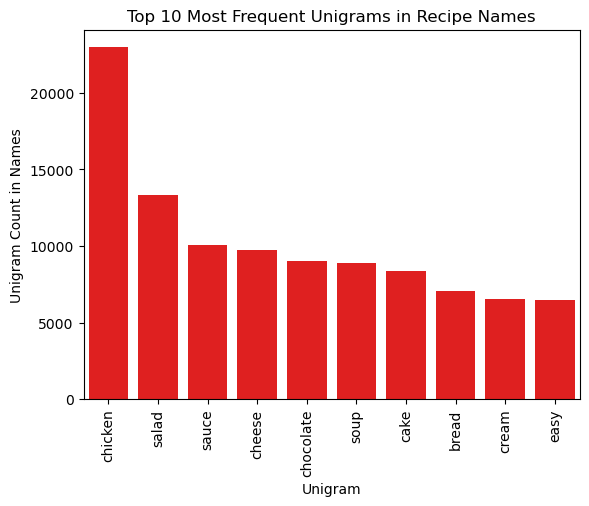

In [9]:
#Top 10 most common unigrams 
unigram_counts = all_unigrams_in_names.value_counts()
top_ten_name_unigrams = unigram_counts.sort_values().nlargest(n = 10)

sns.barplot(top_ten_name_unigrams, color = 'red')
plt.xticks(rotation = 90)
plt.xlabel('Unigram')
plt.ylabel('Unigram Count in Names')
plt.title('Top 10 Most Frequent Unigrams in Recipe Names')

In [10]:
#Analyze the most repeated words in name:
word_cleaner = lambda x: x.lower().strip()

#Filter out all words present in the recipe names 
all_bigrams = []
for i in range(len(all_unigrams_in_names) - 1):
    all_bigrams.append((all_unigrams_in_names[i], all_unigrams_in_names[i + 1]))

all_bigrams = pd.Series(all_bigrams)


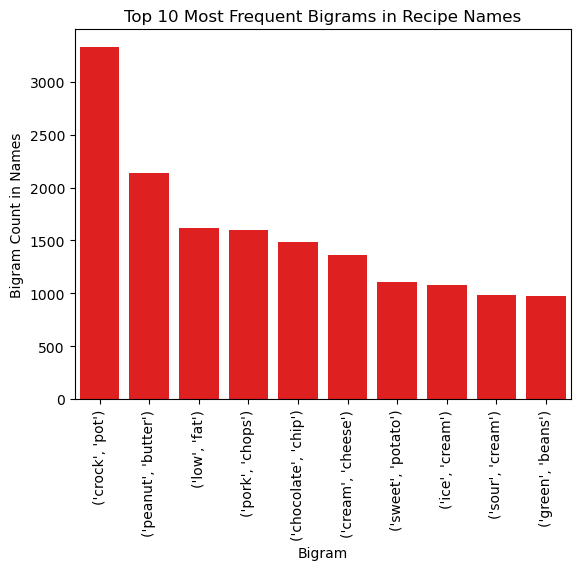

In [11]:
# Top 10 most common bigrams
bigram_counts = all_bigrams.value_counts()
top_ten_name_bigrams = bigram_counts.nlargest(n = 10)  # already sorted descending


sns.barplot(x = top_ten_name_bigrams.index.astype(str), y = top_ten_name_bigrams.values, color = 'red')
plt.xticks(rotation=90)
plt.xlabel('Bigram')
plt.ylabel('Bigram Count in Names')
plt.title('Top 10 Most Frequent Bigrams in Recipe Names')
plt.show()


#### Analyzing Tags

In [49]:
#Analyze the most repeated words in name:
tag_cleaner = lambda x: x.replace('\'', '').replace('[', '').replace(']', '').replace(',', '')

cleaned_tags = all_recipes_raw['tags'].apply(tag_cleaner)
final_tags = pd.Series([word for tag in cleaned_tags for word in tag.split()])

Text(0.5, 1.0, 'Top 10 Most Frequent Unigrams in Recipe Names')

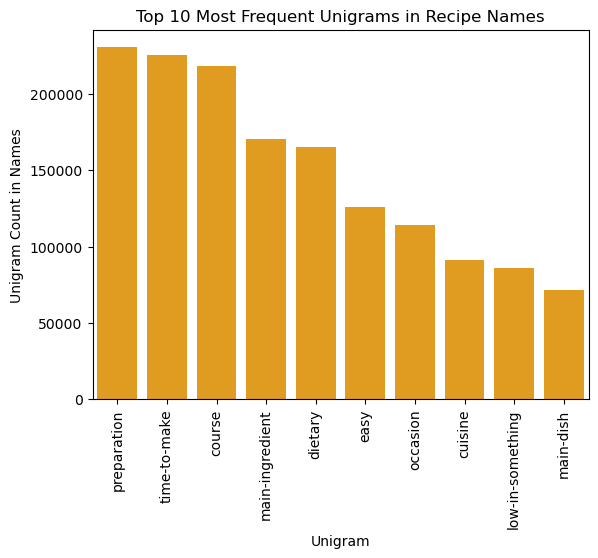

In [ ]:
tag_counts = final_tags.value_counts()
top_ten_tags = tag_counts.sort_values().nlargest(n = 10)

sns.barplot(top_ten_tags, color = 'orange')
plt.xticks(rotation = 90)
plt.xlabel('Tags')
plt.ylabel('Total Tag Count Across Data')
plt.title('Top 10 Most Frequent Tags')